<a href="https://colab.research.google.com/github/museeuu/pollutionairjakarta2023/blob/main/Intro_to_Machine_Learning_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
#import library
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, KFold
from imblearn.over_sampling import SMOTE

In [25]:
#import data
data = "/content/drive/MyDrive/Intro to Machine Learning/Data Indeks Standar Pencemar Udara di Provinsi DKI Jakarta 2023.csv"
dataset = pd.read_csv(data)
dataset

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,parameter_pencemar_kritis,kategori
0,2/25/2023,DKI5 Kebon Jeruk Jakarta Barat,35,-,13,12,31,18,35,PM10,BAIK
1,2/26/2023,DKI5 Kebon Jeruk Jakarta Barat,23,-,14,9,32,11,32,O3,BAIK
2,2/27/2023,DKI5 Kebon Jeruk Jakarta Barat,20,-,13,8,33,13,33,O3,BAIK
3,2/28/2023,DKI5 Kebon Jeruk Jakarta Barat,30,-,21,11,28,18,30,PM10,BAIK
4,3/1/2023,DKI1 Bunderan HI,38,44,50,8,19,27,50,SO2,BAIK
...,...,...,...,...,...,...,...,...,...,...,...
1820,11/26/2023,DKI5 Kebon Jeruk,48,71,33,21,44,20,71,PM25,SEDANG
1821,11/27/2023,DKI5 Kebon Jeruk,51,76,32,18,53,19,76,PM25,SEDANG
1822,11/28/2023,DKI5 Kebon Jeruk,56,88,33,20,48,21,88,PM25,SEDANG
1823,11/29/2023,DKI5 Kebon Jeruk,56,88,32,18,56,18,88,PM25,SEDANG


Normalize Data

In [26]:
dataset['kategori'].value_counts()

SEDANG                1358
BAIK                   236
TIDAK SEHAT            207
TIDAK ADA DATA          21
SANGAT TIDAK SEHAT       3
Name: kategori, dtype: int64

In [27]:
#rename value SEDANG to BAIK in column categori
dataset['kategori'] = dataset['kategori'].replace(['SEDANG'], 'BAIK')
dataset['kategori'] = dataset['kategori'].replace(['SANGAT TIDAK SEHAT'], 'TIDAK SEHAT')
dataset['kategori'].value_counts()

BAIK              1594
TIDAK SEHAT        210
TIDAK ADA DATA      21
Name: kategori, dtype: int64

Feature Engineering

Menghapus kolom tanggal, karena tidak akan digunakan dalam klasifikasi

In [28]:
dataset = dataset.drop(['tanggal'], axis=1)
dataset

,stasiun,pm10,pm25,so2,co,o3,no2,max,parameter_pencemar_kritis,kategori
0,DKI5 Kebon Jeruk Jakarta Barat,35,-,13,12,31,18,35,PM10,BAIK
1,DKI5 Kebon Jeruk Jakarta Barat,23,-,14,9,32,11,32,O3,BAIK
2,DKI5 Kebon Jeruk Jakarta Barat,20,-,13,8,33,13,33,O3,BAIK
3,DKI5 Kebon Jeruk Jakarta Barat,30,-,21,11,28,18,30,PM10,BAIK
4,DKI1 Bunderan HI,38,44,50,8,19,27,50,SO2,BAIK
...,...,...,...,...,...,...,...,...,...,...
1820,DKI5 Kebon Jeruk,48,71,33,21,44,20,71,PM25,BAIK
1821,DKI5 Kebon Jeruk,51,76,32,18,53,19,76,PM25,BAIK
1822,DKI5 Kebon Jeruk,56,88,33,20,48,21,88,PM25,BAIK
1823,DKI5 Kebon Jeruk,56,88,32,18,56,18,88,PM25,BAIK


In [29]:
label_encoder = preprocessing.LabelEncoder()
#kolom stasiun
dataset['stasiun']= label_encoder.fit_transform(dataset['stasiun'])
#kolom parameter_pencemar_kritis
dataset['parameter_pencemar_kritis']= label_encoder.fit_transform(dataset['parameter_pencemar_kritis'])
#kolom kategori
dataset['kategori'] = dataset['kategori'].replace(['BAIK', 'TIDAK SEHAT'],[1, 0])
dataset

,stasiun,pm10,pm25,so2,co,o3,no2,max,parameter_pencemar_kritis,kategori
0,14,35,-,13,12,31,18,35,4,1
1,14,23,-,14,9,32,11,32,3,1
2,14,20,-,13,8,33,13,33,3,1
3,14,30,-,21,11,28,18,30,4,1
4,6,38,44,50,8,19,27,50,6,1
...,...,...,...,...,...,...,...,...,...,...
1820,15,48,71,33,21,44,20,71,5,1
1821,15,51,76,32,18,53,19,76,5,1
1822,15,56,88,33,20,48,21,88,5,1
1823,15,56,88,32,18,56,18,88,5,1


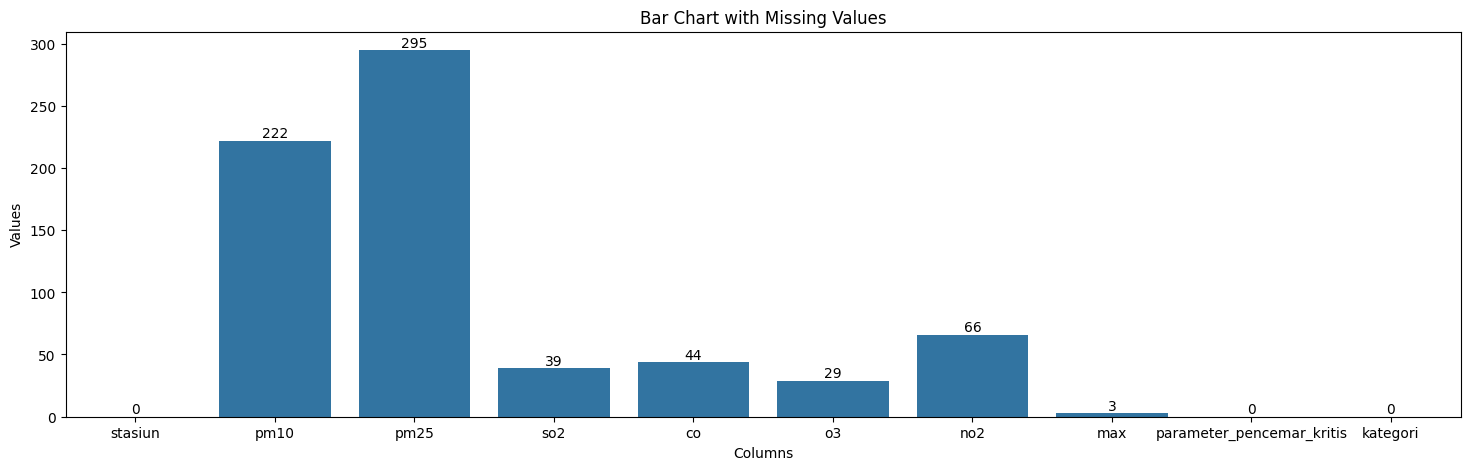

In [30]:
#definisikan nilai missing yang kemungkinan terjadi
missing_values = ['', ' ', 'NaN', 'Nan', 'nan', '.', ',','-','--','---']
col_names = list(dataset.columns)
dataset[col_names] = dataset[col_names].replace(missing_values, np.nan)
# Count the missing values in each column
missing_values = dataset.isnull().sum()
missing_values = pd.DataFrame(missing_values, columns=['count'])
missing_values.reset_index(inplace=True)
#set frame
plt.figure(figsize=(18, 5))
ax = sns.barplot(x='index', y='count', data=missing_values)
plt.bar_label(ax.containers[0])
# Set labels and title
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Bar Chart with Missing Values')
# Show the plot
plt.show()

Menjaga keaslian data, missing values akan dihapus.

In [31]:
 #drop missing value
 dataset = dataset.dropna()
 dataset.isnull().sum()

stasiun                      0
pm10                         0
pm25                         0
so2                          0
co                           0
o3                           0
no2                          0
max                          0
parameter_pencemar_kritis    0
kategori                     0
dtype: int64

[Text(0, 0, '103'), Text(0, 0, '1181')]

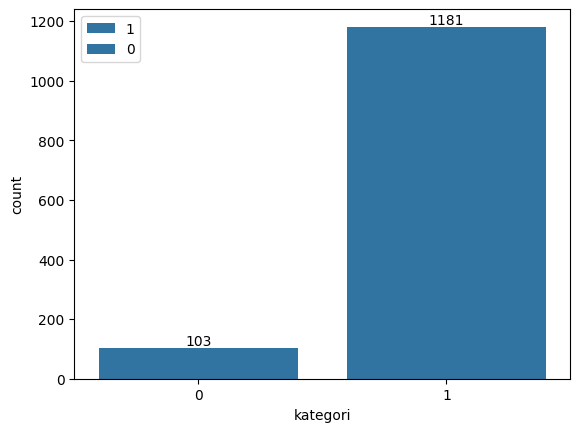

In [32]:
#Check distribution of our label data
ax = sns.countplot(data = dataset, x = "kategori", label = dataset["kategori"].unique())
ax.bar_label(ax.containers[0])

In [33]:
#replace type data object to int
dataset = dataset.astype(int)
#smote
sm = SMOTE(random_state = 42)
X_res, y_res = sm.fit_resample(dataset.iloc[:,:-1], dataset.iloc[:,-1:])
dataset = pd.concat([X_res, y_res], axis=1)
dataset.duplicated().sum()
dataset

,stasiun,pm10,pm25,so2,co,o3,no2,max,parameter_pencemar_kritis,kategori
0,6,38,44,50,8,19,27,50,6,1
1,6,29,33,47,11,21,27,47,6,1
2,6,38,46,49,9,16,25,49,6,1
3,6,33,41,47,11,21,22,47,6,1
4,6,31,44,46,9,20,19,46,6,1
...,...,...,...,...,...,...,...,...,...,...
2357,13,72,107,28,20,27,17,107,5,0
2358,9,74,104,22,11,38,31,104,5,0
2359,13,79,109,29,29,27,25,109,5,0
2360,7,67,108,47,9,30,33,108,5,0


[Text(0, 0, '1181'), Text(0, 0, '1181')]

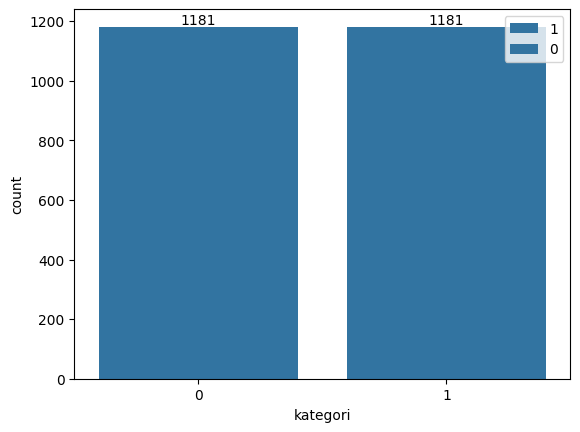

In [34]:
# Check distribution of our label data
ax = sns.countplot(data = dataset, x = "kategori", label = dataset["kategori"].unique())
ax.bar_label(ax.containers[0])

[Text(0, 0, '231'), Text(0, 0, '0')]

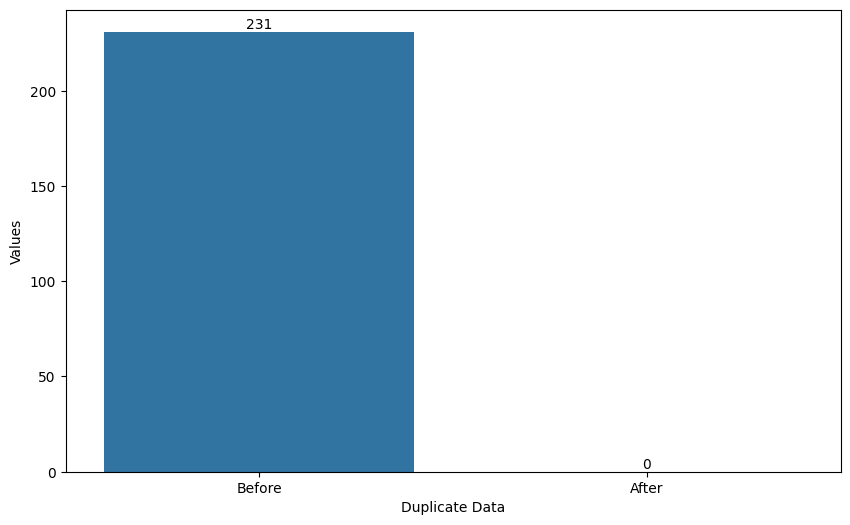

In [35]:
before = dataset.duplicated().sum()
dataset = dataset.drop_duplicates()
after = dataset.duplicated().sum()
drop_dup = {
'Duplicate Data': ['Before', 'After'],
'Values': [before ,after],
}
# Create a DataFrame from the dictionary
drop_dup = pd.DataFrame(drop_dup)
#set frame
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Duplicate Data', y='Values', data=drop_dup)
plt.bar_label(ax.containers[0])

[Text(0, 0, '950'), Text(0, 0, '1181')]

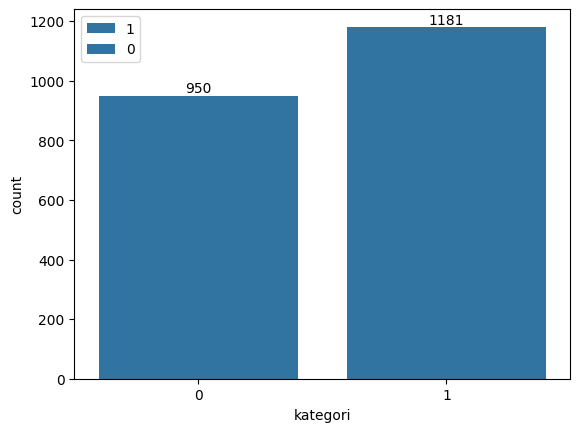

In [36]:
# Check distribution of our label data
ax = sns.countplot(data = dataset, x = "kategori", label = dataset["kategori"].unique())
ax.bar_label(ax.containers[0])

Model

Splitting Data

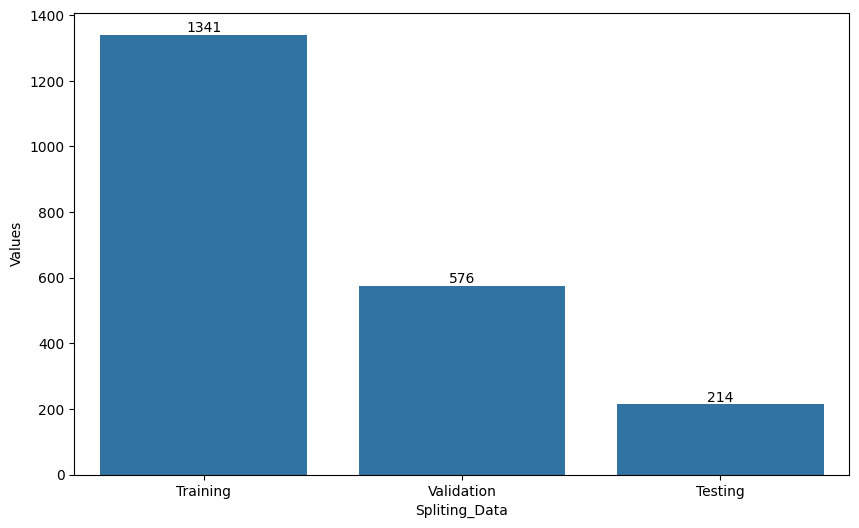

In [37]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1:]

#spliting data training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42, stratify = y)
#spliting data training and validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = 42, stratify = y_train)

data_split = {
 'Spliting_Data': ['Training', 'Validation', 'Testing'],
 'Values': [len(x_train),len(x_val),len(x_test)],
}
# Create a DataFrame from the dictionary
data_split = pd.DataFrame(data_split)
#set frame
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Spliting_Data', y='Values', data=data_split)
plt.bar_label(ax.containers[0])
# Show the plot
plt.show()

In [38]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

Accuracy: 0.9895833333333334
Precision: 1.0
Recall: 0.9811912225705329
F1 score: 0.990506329113924


[Text(0, 0, '0.989583'),
 Text(0, 0, '1'),
 Text(0, 0, '0.981191'),
 Text(0, 0, '0.990506')]

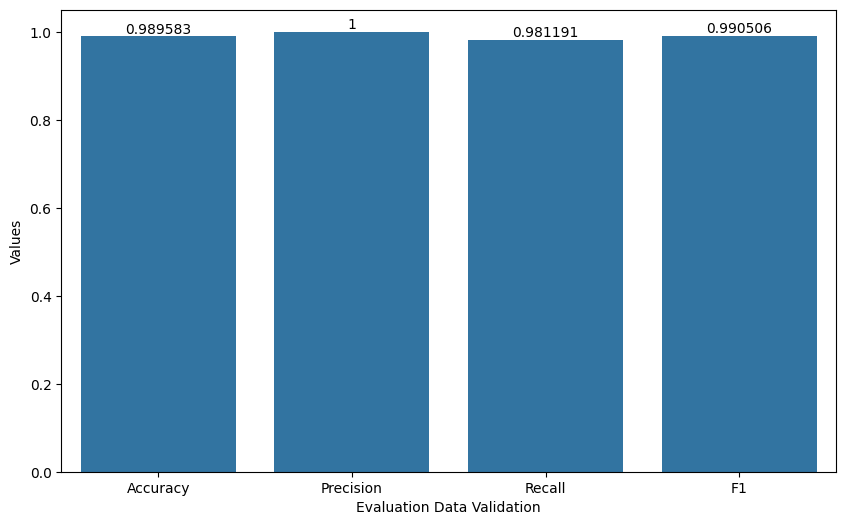

In [39]:
y_pred_val = knn.predict(x_val)
# Calculating accuracy
accuracy = accuracy_score(y_val, y_pred_val)
print("Accuracy:", accuracy)
# Calculating precision
precision = precision_score(y_val, y_pred_val)
print("Precision:", precision)
# Calculating recall
recall = recall_score(y_val, y_pred_val)
print("Recall:", recall)
# Calculating F1 score
f1 = f1_score(y_val, y_pred_val)
print("F1 score:", f1)
eval_val = {
   'Evaluation Data Validation': ['Accuracy', 'Precision', 'Recall','F1'],
   'Values': [accuracy,precision,recall,f1],
}
# Create a DataFrame from the dictionary
eval_val = pd.DataFrame(eval_val)
#set frame
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Evaluation Data Validation', y='Values', data=eval_val)
plt.bar_label(ax.containers[0])

In [40]:
#classification_report
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       257
           1       1.00      0.98      0.99       319

    accuracy                           0.99       576
   macro avg       0.99      0.99      0.99       576
weighted avg       0.99      0.99      0.99       576



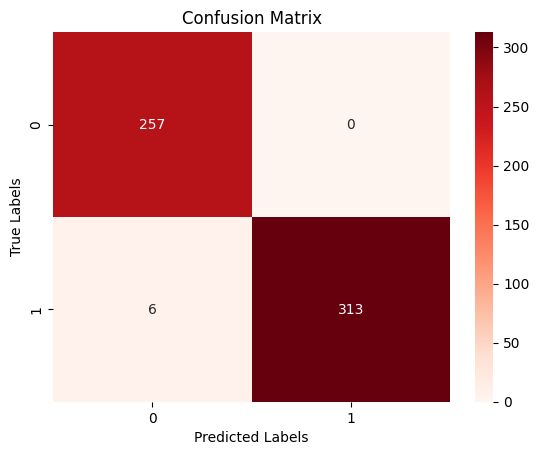

In [41]:
# Create confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
# Plot confusion matrix
sns.heatmap(cm_val, annot=True, fmt="d", cmap=plt.cm.Reds)
# Set labels, title, and ticks
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


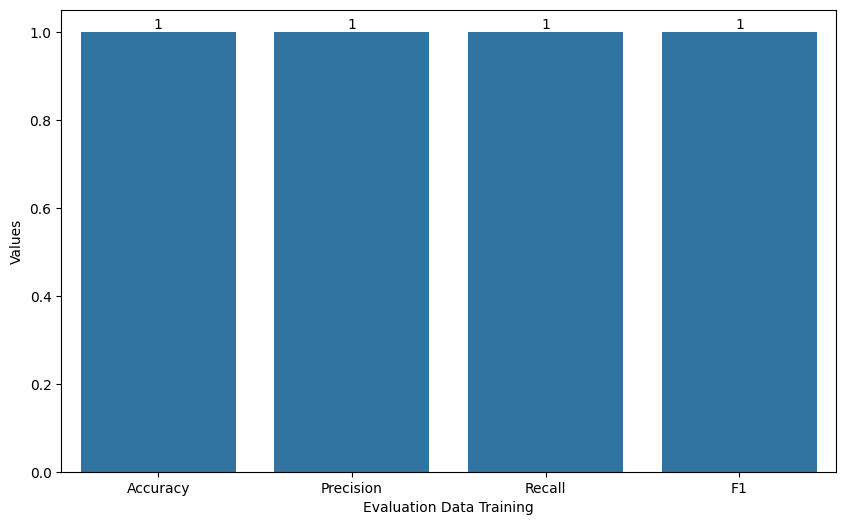

In [42]:
y_pred_train = knn.predict(x_train)
# Calculating accuracy
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy:", accuracy)
# Calculating precision
precision = precision_score(y_train, y_pred_train)
print("Precision:", precision)
# Calculating recall
recall = recall_score(y_train, y_pred_train)
print("Recall:", recall)
# Calculating F1 score
f1 = f1_score(y_train, y_pred_train)
print("F1 score:", f1)
eval_train = {
   'Evaluation Data Training': ['Accuracy', 'Precision', 'Recall','F1'],
   'Values': [accuracy,precision,recall,f1],
}

# Create a DataFrame from the dictionary
eval_train = pd.DataFrame(eval_train)
#set frame
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Evaluation Data Training', y='Values', data=eval_train)
plt.bar_label(ax.containers[0])
# Show the plot
plt.show()

In [43]:
#classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       598
           1       1.00      1.00      1.00       743

    accuracy                           1.00      1341
   macro avg       1.00      1.00      1.00      1341
weighted avg       1.00      1.00      1.00      1341



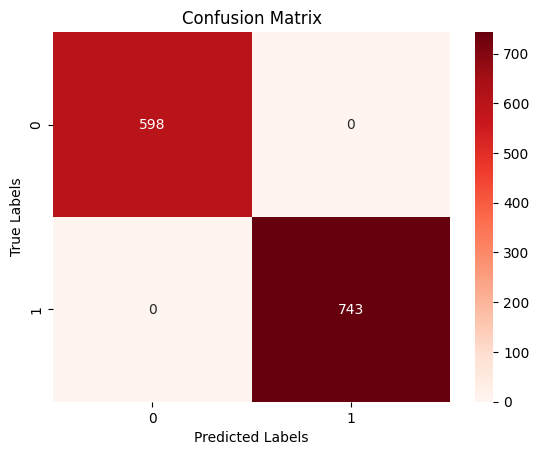

In [44]:
# Create confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train)
# Plot confusion matrix
sns.heatmap(cm_train, annot=True, fmt="d", cmap=plt.cm.Reds)
# Set labels, title, and ticks
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [45]:
#predict data testing
x_test["predict_categori"] = knn.predict(x_test)
x_test

,stasiun,pm10,pm25,so2,co,o3,no2,max,parameter_pencemar_kritis,predict_categori
1705,12,66,107,30,13,23,16,107,5,0
1991,12,66,106,30,12,23,14,106,5,0
1583,7,73,108,42,11,33,33,108,5,0
330,10,22,31,52,5,9,0,52,6,1
199,8,40,55,57,21,17,24,57,6,1
...,...,...,...,...,...,...,...,...,...,...
1375,9,81,103,29,9,45,28,103,5,0
1801,13,88,119,27,24,34,19,119,5,0
174,6,38,53,51,11,13,9,53,5,1
1576,7,70,107,43,9,36,33,107,5,0


In [46]:
y_test

,kategori
1705,0
1991,0
1583,0
330,1
199,1
...,...
1375,0
1801,0
174,1
1576,0


from matplotlib import pyplot as plt
y_test['kategori'].plot(kind='hist', bins=20, title='kategori')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
y_test['kategori'].plot(kind='line', figsize=(8, 4), title='kategori')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Evaluate a model using K-fold cross validation
# Create a class model
ols_all_pred = StatsmodelsRegressor(smf.ols, "Salary ~ Age + Gender + C(EducationLevel) + YearsOfExperience + Age:YearsOfExperience")

# Create k-fold splitter object
kfold = KFold(n_splits=5, shuffle = True, random_state=123)

scores_ols_all_pred = cross_val_score(estimator = ols_all_pred,
                                       X = df_salary,
                                       y = df_salary["Salary"],
                                       cv = kfold,
                                       scoring = "r2")
scores_ols_all_pred = pd.DataFrame(data = scores_ols_all_pred,
                                    columns=["test_rsquared"])
scores_ols_all_pred["folds"] = [f"Folds {i+1}" for i in range(5)]
scores_ols_all_pred